--- Kheire --- 

Work in progress. 

Data Cleaning Phase 1 is ready. 

Data Cleaning Phase 2 is work in progress. It is done on the scraped data. 

This Notebook illustrates the different steps taken to do the data cleaning and feature engineering.

In [1]:
# import necessary libraries
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kader\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Cleaning Phase 1

This the first phase of data cleaning. It is very basic and is done on the data format and columns names. 

The first thing noticed was that when reading the original csv file "books.csv" some contents of sepicific sections in specific rows were separated by commas. This caused an error, because pd.read_csv considered them as content belonging to different sections (i.e. columns), resulting in different number of columns for several rows. Luckily, these content were separate by a comma and space ", ", which made it easy to solve the problem by replacing the ", " by "/" as seen below. "books_updated.csv" is the new updated csv which is read by pandas with success.

In [2]:
### COMMENT THE FOLLOWING CELL IF YOU HAVE ALREADY RUN IT BEFORE AND SAVED THE books_updated.csv ###
# Specify the filename
filename = 'books.csv'
updated_filename = "books_updated.csv"

## In some cases in certain fields such us author the authors are separated by ", " 
## to avoid problems when reading the csv directly using pandas and to retain all rows the following steps done

# Open the file and read lines
with open(filename, 'r', encoding='utf-8') as file: # utf-8 encoding to support all languages since there are non-english content
    lines = file.readlines()

# Process the lines to handle unwanted delimiters
cleaned_lines = []
is_firstline = True # used to avoid updating the first line

for line in lines:
    
    if is_firstline: # if it is the first line i.e. Header do not update it
        is_firstline = False
        cleaned_lines.append(line)
        continue
    cleaned_line = line.replace(', ', '/')

    # Append the cleaned line
    cleaned_lines.append(cleaned_line)

# rejoin all the lines to create a new updated csv
with open(updated_filename, 'w', encoding='utf-8') as output_file:
    for cleaned_line in cleaned_lines:
        output_file.write(cleaned_line + '\n')


In [3]:
# Read the cleaned data into a DataFrame
df = pd.read_csv(updated_filename, delimiter = ",", encoding = 'utf-8', index_col=False) 

# Look at the first 5 rows of the DataFrame
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


Looking closer at the column names, we notice that in one of the column '  num_pages' the name starts with space. For ease of use, it is better to remove this unnecessary space.

In [4]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [5]:
# Remove the space before the column num_pages, for ease of use
df.rename(columns={'  num_pages': '  num_pages'.replace(' ', '')}, inplace=True)
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

Examining the column types, it is noticed that some of the columns that are supposed to be numerical types are object types

In [6]:
types_columns=df.dtypes
number_lines,number_columns=df.shape
print(types_columns)

bookID                 object
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                 object
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count     object
publication_date       object
publisher              object
dtype: object


In [7]:
# investigate if their are non-numerical non-date types in supposedly numerical and date columns

# text_reviews_count 
# Filter the DataFrame to get non-numerical values in the specified column
def check_non_numerical_date(columns_list: list, intended_type: str):
    
    if intended_type == "numerical":
        for column in columns_list:
            non_numerical_values = df.loc[~df[column].apply(pd.to_numeric, errors='coerce').notna()]
            print("The non_numerical_values in column {} : ".format(column), non_numerical_values[column])

    elif intended_type == "date":
        for column in columns_list:
            non_numerical_values = df.loc[~df[column].apply(pd.to_datetime, errors='coerce').notna()]
            print("The non_date_values in column {} : ".format(column), non_numerical_values[column])
    
# Display the non-numerical and non_date values of the selected columns
columns = ["isbn", "isbn13", "text_reviews_count"]
check_non_numerical_date(columns, "numerical")
check_non_numerical_date(["publication_date"], "date")

The non_numerical_values in column isbn :  3        043965548X
12       076790818X
16       076790382X
27       097669400X
40       006076273X
            ...    
11090    030727411X
11101    074347788X
11106    057305133X
11110    843221728X
11115    972233168X
Name: isbn, Length: 985, dtype: object
The non_numerical_values in column isbn13 :  1847    en-US
Name: isbn13, dtype: object
The non_numerical_values in column text_reviews_count :  1847    9/1/2003
Name: text_reviews_count, dtype: object
The non_date_values in column publication_date :  1847      MTV Books
8180     11/31/2000
11098     6/31/1982
Name: publication_date, dtype: object


From the above investigation one can notice the following : 
- isbn is not numerical since some of the isbn codes end with X 
- we notice that at index location 1847 the data is shifted to the left
- dates at index locations 8180 and 11098 were not considered as dates since they are wrong. June and November are 31 days, but in reality they are only 30 days.

Also, as seen below there is one empty cell in publisher column, which is on index location 1847.

In [8]:
df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             1
dtype: int64

In [9]:
df["publisher"][df["publisher"].isna()==True]

1847    NaN
Name: publisher, dtype: object

In [10]:
df.iloc[1847]

bookID                6549/ said the shotgun to the head.
title                                       Saul Williams
authors                                              4.22
average_rating                                743470796.0
isbn                                        9780743470797
isbn13                                              en-US
language_code                                         192
num_pages                                            2762
ratings_count                                         214
text_reviews_count                               9/1/2003
publication_date                                MTV Books
publisher                                             NaN
Name: 1847, dtype: object

One can notice that there is a / in the bookID which separates the BookID from the book title. This must be a result from updating automatically the csv files at the beginning. 

Below is the code to fix this unwanted mistake

In [318]:
bookid_title = df["bookID"].iloc[1847].split('/')


# content of the remaining columns
remaining_columns = df[['title', 'authors', 'average_rating', 'isbn', 'isbn13',
                                   'language_code', 'num_pages', 'ratings_count', 
                                   'text_reviews_count', 'publication_date']].iloc[1847]


# rearrange cells content for each column
df.iloc[1847, 2:] = remaining_columns
df["bookID"].iloc[1847]= bookid_title[0]
df["title"].iloc[1847]= bookid_title[1]

C:\Users\cleme\AppData\Local\Temp\ipykernel_18128\3963356864.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bookID"].iloc[1847]= bookid_title[0]
C:\Users\cleme\AppData\Local\Temp\ipykernel_18128\3963356864.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["title"].iloc[1847]= bookid_title[1]


In [319]:
# rechek the content 
df.iloc[1847]

bookID                                          6549
title                  said the shotgun to the head.
authors                                Saul Williams
average_rating                                  4.22
isbn                                     743470796.0
isbn13                                 9780743470797
language_code                                  en-US
num_pages                                        192
ratings_count                                   2762
text_reviews_count                               214
publication_date                            9/1/2003
publisher                                  MTV Books
Name: 1847, dtype: object

In [320]:
# Check the types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  object
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7   num_pages           11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  object
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.0+ MB


For some reasons the supposedly numerical columns became objects 
Re-investigate again if they contain non-numerical content

In [321]:
# re-investigate if there is non-numerical content in supposedly numerical columns
columns = ["average_rating", "isbn13", "text_reviews_count", "num_pages", "ratings_count", "text_reviews_count"]
check_non_numerical_date(columns, "numerical")

The non_numerical_values in column average_rating :  Series([], Name: average_rating, dtype: object)
The non_numerical_values in column isbn13 :  Series([], Name: isbn13, dtype: object)
The non_numerical_values in column text_reviews_count :  Series([], Name: text_reviews_count, dtype: object)
The non_numerical_values in column num_pages :  Series([], Name: num_pages, dtype: object)
The non_numerical_values in column ratings_count :  Series([], Name: ratings_count, dtype: int64)
The non_numerical_values in column text_reviews_count :  Series([], Name: text_reviews_count, dtype: object)


They do not contain non-numerical content, so will transform them to numerical

In [322]:
# convert to numerical
def convert_to_numerical(columns_list: list):
    
    for column in columns_list:
        df[column] = df[column].apply(pd.to_numeric)

columns = ["average_rating", "isbn13", "text_reviews_count", "num_pages", "ratings_count", "text_reviews_count"]

convert_to_numerical(columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  object 
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


In [323]:
# fix the dates by replacing 31 with 30 in June and November
# convert the date column to type pd.datetime
df["publication_date"].iloc[8180] = '11/30/2000'
df["publication_date"].iloc[11098] = '6/30/1982'

C:\Users\cleme\AppData\Local\Temp\ipykernel_18128\3398859105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["publication_date"].iloc[8180] = '11/30/2000'
C:\Users\cleme\AppData\Local\Temp\ipykernel_18128\3398859105.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["publication_date"].iloc[11098] = '6/30/1982'


Resave the DataFrame to avoid repeating the process each time we want to use the df

In [324]:
df.to_csv("books_updated.csv", index_label=False) # index_label = False so that it does not add another index label to the DataFrame

# Data Cleaning Phase 2

This data cleaning is done on the data set after doing webscraping. Through webscraping extra features were extracted which are: 

- first_publish : this is the date a book was first published (this will help distinguish two different books with the same name)
- book_format : this is the format of the book (some books are present in different formats (paperback, Audio CD, hardcover))
- new_publisher: this is because it was noticed that in the original data some books had wrong publishers
- edition_avgRating: this is the actaul average rating of each edition
- added_toShelves: this is the number of users that added a book to shelves

*For more details about the process of scraping, please refer to scraper/scraper.py*

### Read the Data

In [11]:
# read the scraped data
df_scraped = pd.read_csv("scraper/booksRating_extraFeats.csv")

In [12]:
df_scraped.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,book_format,new_publisher,edition_avgRating,added_toShelves
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,"July 16, 2005",Paperback,Scholastic Inc,4.57,4405980.0
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,"June 21, 2003",Paperback,Scholastic Inc.,4.50,4518536.0
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,"July 2, 1998",Hardcover,NaN,4.05,7469.0
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,"July 8, 1999",Mass Market Paperback,Scholastic Inc.,4.57,5223956.0
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,"October 1, 2003",Paperback,Scholastic,4.72,172736.0


In [13]:
df_scraped.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,book_format,new_publisher,edition_avgRating,added_toShelves
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,2004-12-21,Da Capo Press,"December 1, 2004",Paperback,Da Capo Press,4.06,552.0
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,1988-12-01,Penguin Books,"June 27, 1987",Paperback,Penguin Books,4.04,4269.0
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,1993-08-01,Penguin Books,"January 1, 1990",Paperback,Penguin Publishing Group,3.98,4686.0
11125,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2007-02-27,Ecco,"January 1, 2007",Hardcover,Ecco,3.75,2948.0
11126,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,2006-05-28,Edimat Libros,"June 1, 1876",Paperback,NaN,3.72,228.0


In [14]:
df_scraped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
 12  first_published     11125 non-null  object 
 13  book_format         11126 non-null  object 
 14  new_publisher       8360 non-null   object 
 15  edition_avgRating   11124 non-null  float64
 16  adde

### Fill Missing Data

In the new dataset, there is 2 missing data in the first_published, 1 missing value in the book_format, 3 missing values in the edition_avgRating and added_toShelves. These were values that the scraper failed to get. Since they are very few, they will be filled manually. 

In [15]:
df_scraped[df_scraped[["first_published", "book_format", "edition_avgRating", "added_toShelves"]].isna().any(axis=1)]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,book_format,new_publisher,edition_avgRating,added_toShelves
2255,8077,Animales No Se Visten Los (Animals Should Def...,Judi Barrett/Ron Barrett,4.11,1595191356,9781595191359,eng,32,0,0,1991-10-30,Live Oak Media,"January 1, 1970",Paperback,Atheneum Books for Young Readers,NaN,NaN
6396,24062,The Deep (Dive Trilogy),Gordon Korman,3.78,0613674839,9780613674836,eng,148,0,0,2003-07-01,Turtleback Books,NaN,NaN,NaN,NaN,NaN
8476,32552,Essential Tales and Poems,Edgar Allan Poe/Benjamin F. Fisher,4.36,1593080646,9781593080648,en-US,688,66382,109,2004-10-25,Barnes Noble Classics,NaN,Paperback,Barnes & Noble Classics,4.36,92622.0
8520,32703,The Diary of Ellen Rimbauer: My Life at Rose Red,Joyce Reardon/Steven Rimbauer/Ridley Pearson,3.67,0786890436,9780786890439,eng,277,7852,352,2001-04-29,Hyperion,"January 1, 2001",Mass Market Paperback,Hyperion,NaN,NaN


In [16]:
df_scraped.loc[2255, ["edition_avgRating", "added_toShelves"]] = [4.11, 5402]
# df_scraped.loc[6396, ["first_published", "book_format", "new_publisher", "edition_avgRating", "added_toShelve"]] ### !!!! Couldn't find exact book edition online !!!!
df_scraped.loc[8476, ["first_published"]] = ["January 1, 1843"]
df_scraped.loc[8520, ["edition_avgRating", "added_toShelves"]] = [3.7, 15942]

One of the books at index 6396 was not found on good reads even when searching by book ID, isbn and isbn13. However, it was found under the following link on GoodReads : https://www.goodreads.com/book/show/24037.The_Deep

As the information on the goodreads page are not exactly the same as the ones in line 6385, they information are refilled manually based on the GoddReads page (the title, num_pages and average rating where the same in the database and the link to goodread).

In [17]:
df_scraped.loc[6396, ["ratings_count", "text_reviews_count", "first_published","book_format","new_publisher","edition_avgRating","added_toShelves"]] = [1659,66,"July 1, 2003","Paperback","Scholastic",3.78,3004]

In [18]:
df_scraped.iloc[6396]

bookID                                  24062
title                 The Deep (Dive Trilogy)
authors                         Gordon Korman
average_rating                           3.78
isbn                               0613674839
isbn13                          9780613674836
language_code                             eng
num_pages                                 148
ratings_count                            1659
text_reviews_count                         66
publication_date                   2003-07-01
publisher                    Turtleback Books
first_published                  July 1, 2003
book_format                         Paperback
new_publisher                      Scholastic
edition_avgRating                        3.78
added_toShelves                        3004.0
Name: 6396, dtype: object

For the new_publisher, the scraper failed to get a lot of values, this is because of how the publisher is saved in the html. Due to constraint of time, and since there is already a publisher column in the original dataset. In the cases where there are NaN the old publisher will be put. The new publisher will be taken, only in the cases where the new publisher is different from the old publisher in value.

In [19]:
for index, row in df_scraped.iterrows():
    # Check if the new publisher is different from the old publisher
    if pd.notna(row['new_publisher']) and row['new_publisher'] != row['publisher']:
        # Update the publisher with the new publisher value
        df_scraped.at[index, 'publisher'] = row['new_publisher']
    else:
        # Use the old publisher if the new publisher is NaN or the same as the old publisher
        df_scraped.at[index, 'publisher'] = row['publisher']

In [20]:
df_scraped[["publisher", "new_publisher"]].sample(5)

,publisher,new_publisher
6074,小学館,NaN
2167,Random House Books for Young Readers,Random House Books for Young Readers
10770,Dell Publishing Company,Dell Publishing Company
7643,Wiley,Wiley
2680,W. W. Norton & Company,W. W. Norton & Company


In [21]:
# drop new_publisher column
df_scraped.drop(columns="new_publisher", inplace=True)

### Set text columns to lower text

When dealing with text data it always safer to have them all in the same case either lower or upper 

In [22]:
# get the text columns
text_columns = df_scraped.select_dtypes(include=['object']).columns

# Convert to lowercase
df_scraped = to_lower(df_scraped, text_columns)

In [23]:
df_scraped.sample(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,book_format,edition_avgRating,added_toShelves
123,249,tropic of cancer,henry miller/jiří níl,3.68,0802131786,9780802131782,eng,318,53206,2376,1994-01-06,grove press,"january 1, 1934",paperback,3.70,164251.0
9930,40005,hannibal's children,john maddox roberts,3.68,0441010385,9780441010387,eng,359,204,18,2003-03-25,berkley publishing group,"january 1, 2002",mass market paperback,3.71,541.0
6299,23756,berlin diary: the journal of a foreign corresp...,william l. shirer/gordon a. craig,4.29,0801870569,9780801870569,eng,627,3574,198,2002-04-17,johns hopkins university press,"june 20, 1941",paperback,4.29,11945.0
10000,40286,first meetings: in the enderverse,orson scott card,3.84,1841493112,9781841493114,en-gb,228,69,2,2013-03-01,little brown young readers,"january 1, 1999",paperback,3.92,170.0
9720,38786,juan rulfo's mexico,juan rulfo/carlos fuentes/margo glantz/jorge a...,4.47,158834097x,9781588340979,eng,223,41,3,2002-08-17,smithsonian books,"january 1, 1984",hardcover,4.54,244.0


### Take First Author Name and Create num_contributors Column

We have decided to take only the name of the first author, since usually first authors are the main authors. Another column will be added to indicate the total number of authors/contributors to the book.

In [24]:
# take the first author in the authors column
df_scraped["first_author"] = df_scraped["authors"].apply(lambda x: x.split("/")[0].strip())


In [25]:
df_scraped["first_author"].sample(5)

7458         william empson
1132          henri blocher
7208            john irving
3805              junji ito
2699    james c.    simmons
Name: first_author, dtype: object

In [26]:
df_scraped["num_contributors"] = df_scraped["authors"].apply(lambda x: len(x.split("/")))

In [27]:
df_scraped[["authors","num_contributors"]].sample(5)

,authors,num_contributors
6052,brenda novak,1
8633,william shakespeare/g. blakemore evans/thomas ...,3
4461,kate chopin/cynthia brantley johnson/alyssa h...,3
9777,wolfgang amadeus mozart/lorenzo da ponte/ellen...,3
6538,ingri d'aulaire/edgar parin d'aulaire/michael ...,3


In [28]:
# drop authors column
df_scraped.drop(columns="authors", inplace=True)

### Clean Text Columns

Remove punctuation, and extra white spaces from all text columns.

Better clean the text in publisher column, to avoid having same publishers represented differently. 
Example: indexes 5993, 5365 and 9753, W.W. Norton & Company, W. W. Norton and Company and W. W. Norton  Company represent the same publisher

In [29]:
general_replacements = [
    (r'[^\w\s]', ''), # remove punctuation
    (r'\s\s+', " "), # remove double spaces and more
]

columns_ = ["title", "first_author"]

df_scraped = sub_text(df_scraped, columns_, general_replacements)

In [30]:
# strip to remove spaces from beginning and end
df_scraped["title"] = df_scraped["title"].str.strip()
df_scraped["first_author"] = df_scraped["first_author"].str.strip()

In [31]:
df_scraped[["title", "first_author"]].sample(5)

,title,first_author
152,stranger in a strange land,robert a heinlein
3289,a hundred camels in the courtyard,paul bowles
5039,war and peace,leo tolstoy
9895,a nose for murder jack and jamie 1,lee charles kelley
7617,burt dow deepwater man,robert mccloskey


In [35]:
specific_replacements = [
    (r'\binc.?\b', ""), #remove inc
    (r'\bllc.?\b', ""), #remove llc
    (r'\bltd.?\b', ""), #remove ltd
    (r"w. w.", "ww"), #convert w. w. to ww
    (r"&", " and "), #substiute & by and
    (r'\([^)]*\)', ''), #remove everything within parentheses
    (r"\bpaperbacks?\b", ""), #remove paperback or paperbacks
    (r'\bbooks?\b', ""),  #remove book and books
    (r'\bclassics?\b', ""), #remove classic and classics
    (r'\bpublishers?\b', ""), #remove publisher or publishers
    (r'\bpress\b', ""), #remove press
    (r'\bpublishing\b', ""), #remove publishing
    (r'\bpublications?\b', ""), #remove publication or publications
    (r'\bgroups?\b', "") #remove group or groups
]

df_scraped = sub_text(df_scraped, ["publisher"], specific_replacements)

In [36]:
#Apply thge general replacements on the publisher column 
df_scraped = sub_text(df_scraped, ["publisher"], general_replacements)
# strip to remove spaces from beginning and end
df_scraped["publisher"] = df_scraped["publisher"].str.strip()

In [54]:
df_scraped[['publisher']].sample(5)

,publisher
365,business plus
10786,pocket star
7117,ww norton
10195,gallimard
8271,open court


### Analyse the edition_avgRating column

In [55]:
df_scraped['edition_avgRating'].isna().any()

False

Check cases when the average_rating is different from edition_avgRating

In [56]:
df_rating = df_scraped.copy()
df_rating['diff_rating'] = df_rating['average_rating'] - df_rating['edition_avgRating']
filtered_df = df_rating[df_rating['diff_rating'] != 0]
filtered_df[['title', 'average_rating', 'edition_avgRating']].sample(10)

,title,average_rating,edition_avgRating
6309,ward no 6 and other stories,4.33,4.37
5670,a smart girls guide to money how to make it sa...,4.14,4.06
398,the histories,3.99,4.04
2275,the ravenscar dynasty ravenscar 1,3.63,3.56
6739,child of the owl golden mountain chronicles 7,3.61,3.68
2195,planet of slums,3.92,3.97
7533,heat,3.98,3.99
8125,tom jones,3.74,3.50
6990,seven gothic tales,3.93,3.70
3110,rejoice redemption 4,4.46,4.42


In [57]:
print('The average mean of difference between average rating and edition rating is ', round(df_rating['diff_rating'].mean(),2) )

The average mean of difference between average rating and edition rating is  0.03


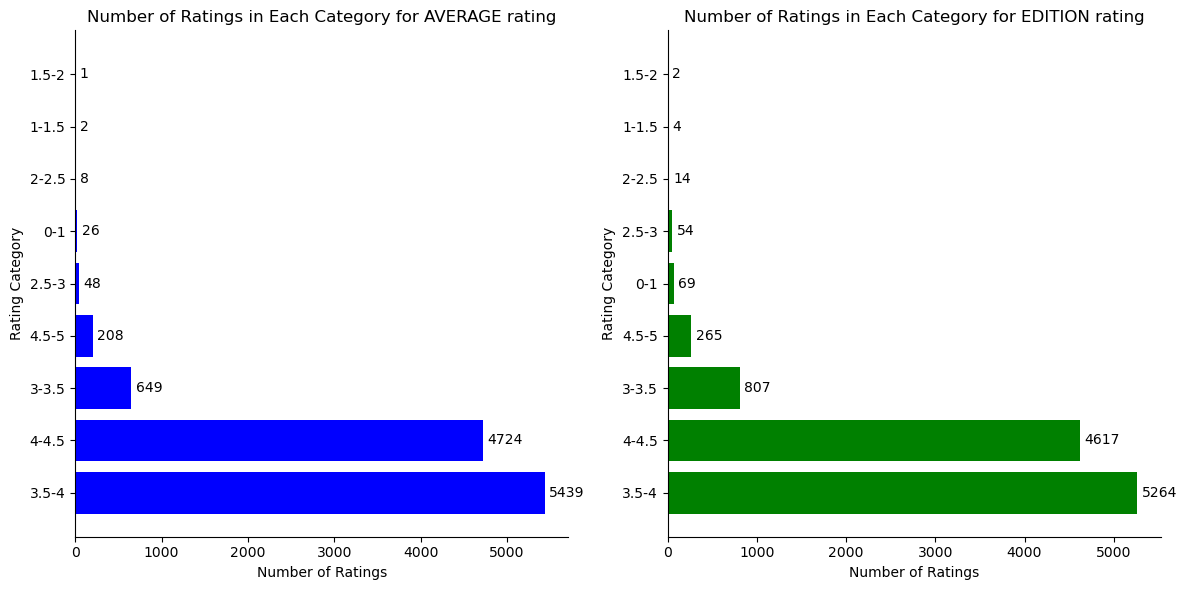

In [58]:
#We need to know if the repartition is the same for average rating or edition rating :

# Define bins and labels for average rating and edition rating
bins = [0, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
labels = ['0-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3', '3-3.5', '3.5-4', '4-4.5', '4.5-5']

# Create a new column with the bin labels for average rating and edition rating
df_rating['average_rating_category'] = pd.cut(df_rating['average_rating'], bins=bins, labels=labels, right=False)
df_rating['edition_rating_category'] = pd.cut(df_rating['edition_avgRating'], bins=bins, labels=labels, right=False)

# Count the number of ratings in each category for both
rating_counts_per_category_average = df_rating['average_rating_category'].value_counts()
rating_counts_per_category_edition = df_rating['edition_rating_category'].value_counts()

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first graph based on df_scraped['average_rating']
axs[0].barh(rating_counts_per_category_average.index, rating_counts_per_category_average.values, color='blue')
axs[0].set_title('Number of Ratings in Each Category for AVERAGE rating')
axs[0].set_xlabel('Number of Ratings')
axs[0].set_ylabel('Rating Category')

# Add values on top of each bar for the first graph
for index, value in enumerate(rating_counts_per_category_average):
    axs[0].text(value+50, index, str(value), ha='left', va='center')

# Plot the second graph based on df_scraped['edition_avgRating']
axs[1].barh(rating_counts_per_category_edition.index, rating_counts_per_category_edition.values, color='green')
axs[1].set_title('Number of Ratings in Each Category for EDITION rating')
axs[1].set_xlabel('Number of Ratings')
axs[1].set_ylabel('Rating Category')

# Add values on top of each bar for the second graph
for index, value in enumerate(rating_counts_per_category_edition):
    axs[1].text(value+50, index, str(value), ha='left', va='center')

# Remove upper and right borders for both subplots
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

When we look at the ratings for each edition, there is very slight improvement in the data imbalance. Yet, we notice that there are more ratings below 3, which are categories with very few ratings.

However, looking at the mean calculated for the difference of the two ratings, we see that it is very small 0.03. So for the vast majority of books, there is very few differences between the 2 ratings. 

In order to have more specific ratings, and to add more relevance to the new data scraped (like book format) and more coherence to already existing data (publication_date and number_of_pages both are linked to the edition), we will now only refer to the edition_avgRating column and drop the average_rating.

In [59]:
df_scraped.drop(columns="average_rating", inplace=True)

### Add "size_of_publisher" column

In [60]:
# Adding the new columns that allows to see if a publisher is often cited
df_scraped['publisher_count'] = df_scraped.groupby('publisher')['publisher'].transform('count')

In [61]:
df_scraped['publisher_count'].value_counts()

publisher_count
1      1129
2       592
556     556
4       412
3       381
       ... 
42       42
38       38
37       37
34       34
32       32
Name: count, Length: 80, dtype: int64

The exact number of time a publisher name is in the database is not as relevant as the number of time an author or a title is in it.
To simplify this information, we can, instead of the count, create a column that categorize the publisher :
- Small publisher (1) = 10 or less times in the database
- Medium publisher (2) = between 10 annd 30 times
- big publisher (3) = more that 20 times

In [62]:
# Create a function to determine the size of the publisher based on the number of times it is mentioned
def determine_size(publisher_count):
    if publisher_count <= 10:
        return 1
    elif 10 < publisher_count <= 30:
        return 2
    else:
        return 3

# Apply the function to the 'publisher_count' column to create the new 'size_of_publisher' column
df_scraped['size_of_publisher'] = df_scraped['publisher_count'].apply(lambda x: determine_size(x))

In [63]:
print('Number of line with small publisher',len(df_scraped[df_scraped['size_of_publisher'] == 1]))
print('Number of line with medium publisher',len(df_scraped[df_scraped['size_of_publisher'] == 2]))
print('Number of line with big publisher',len(df_scraped[df_scraped['size_of_publisher'] == 3]))

Number of line with small publisher 3861
Number of line with medium publisher 2142
Number of line with big publisher 5124


In [64]:
#Now that we have the "size_of_publisher" column, let's delete the "publisher_count" used to create it 
df_scraped.drop(columns=['publisher_count'], inplace=True)

### Create "num_book_per_author" column

In [65]:
# Check for duplicates in a specific column using value_counts
num_book_per_author = df_scraped["first_author"].value_counts()

# Display values with count greater than 1 (indicating duplicates)
print(num_book_per_author[num_book_per_author > 1])

first_author
william shakespeare    88
stephen king           82
jrr tolkien            51
pg wodehouse           46
agatha christie        45
                       ..
paul farmer             2
amy sedaris             2
ruby ann boxcar         2
anthony loyd            2
james lee burke         2
Name: count, Length: 1471, dtype: int64


Similar as we did with publisher, we can create a column called size_of_author which signifies the number of books this author contirbuted to. 
- Small author (1) = 10 or less times in the database
- Medium author (2) = between 10 annd 30 times
- big author (3) = more that 20 times

In [66]:
# Adding the new columns that allows to see if an author is often cited
df_scraped['_author'] = df_scraped.groupby('first_author')['first_author'].transform('count')
df_scraped['size_of_author'] = df_scraped['num_book_per_author'].apply(lambda x: determine_size(x))

In [70]:
print('Number of line with small author',len(df_scraped[df_scraped['size_of_author'] == 1]))
print('Number of line with medium author',len(df_scraped[df_scraped['size_of_author'] == 2]))
print('Number of line with big author',len(df_scraped[df_scraped['size_of_author'] == 3]))

Number of line with small author 7768
Number of line with medium author 2606
Number of line with big author 753


In [71]:
df_scraped.sample(5)

,bookID,title,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,book_format,edition_avgRating,added_toShelves,first_author,num_contributors,size_of_publisher,num_book_per_author,size_of_author
913,3006,the secret garden,0142437050,9780142437056,en-gb,288,517,13,2003-01-30,penguin,"august 1, 1911",paperback,4.10,783.0,frances hodgson burnett,2,3,7,1
8656,33363,mama day,0679721819,9780679721819,eng,312,8922,559,1989-04-23,vintage,"ary 1, 1988",paperback,4.19,23470.0,gloria naylor,1,3,1,1
5233,18882,the malloreon vol 2 sorceress of darshiva the ...,0345483871,9780345483874,eng,528,5457,59,2005-08-30,del rey,"august 30, 2005",paperback,4.37,7535.0,david eddings,1,3,8,1
3374,12317,human all too human complete works 3,0804741719,9780804741712,en-us,396,64,4,2000-12-01,stanford university,"january 1, 1878",paperback,4.17,134.0,friedrich nietzsche,2,1,17,2
7131,27326,the wall,0394756967,9780394756967,eng,640,1829,57,1988-03-12,vintage,"january 1, 1950",paperback,4.28,7827.0,john hersey,1,3,2,1


### Create "is_english" column

In [72]:
# Add a new column 'is_english' with 1 for English (en, en-CA, en-GB,...) and 0 for non-English
df_scraped['is_english'] = np.where(df_scraped['language_code'].str.contains('en', case=False), 1, 0)

In [73]:
df_scraped.sample(10)

,bookID,title,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,book_format,edition_avgRating,added_toShelves,first_author,num_contributors,size_of_publisher,num_book_per_author,size_of_author,is_english
4580,16459,annes house of dreams,1406942359,9781406942354,eng,192,2,0,2006-11-03,hard,"january 1, 1917",paperback,4.50,7.0,lm montgomery,1,1,13,2,1
341,1138,the warren buffett ceo secrets from the berksh...,0471430455,9780471430452,eng,432,39,1,2003-04-18,wiley,"october 15, 2001",paperback,3.78,238.0,robert p miles,2,2,1,1,1
4243,15190,looking for god in harry potter,1414306342,9781414306346,eng,234,1347,94,2006-02-17,saltriver,"may 21, 2004",paperback,4.13,3509.0,john granger,1,1,1,1,1
7453,28636,the curtain an essay in seven parts,0060841869,9780060841867,eng,176,1388,109,2007-01-30,harper,"january 1, 2005",hardcover,4.01,4072.0,milan kundera,2,3,10,1,1
9150,35710,margot fonteyn,0140165304,9780140165302,eng,704,256,17,2005-08-04,penguin,"october 7, 2004",paperback,4.01,1103.0,meredith daneman,1,3,1,1,1
5084,18373,flowers for algernon,0156030306,9780156030304,eng,311,337596,9949,2005-05-01,harvest,"april 1, 1966",paperback,4.17,1120304.0,daniel keyes,1,1,3,1,1
7120,27298,the twentieth wife taj mahal trilogy 1,0743428188,9780743428187,en-us,380,11380,1253,2003-02-18,washington square,"january 29, 2002",paperback,4.06,36039.0,indu sundaresan,1,2,2,1,1
192,434,ghosts the new york trilogy 2,014009735x,9780140097351,eng,96,3672,195,1987-07-07,penguin,"january 1, 1986",paperback,3.64,8195.0,paul auster,1,3,16,2,1
8923,34529,lords and ladies discworld 14 witches 4,055215315x,9780552153157,eng,400,53721,814,2005-08-01,corgi,"january 1, 1992",paperback,4.18,98787.0,terry pratchett,1,2,31,3,1
1195,4035,the burden of proof kindle county legal thrill...,0446677124,9780446677127,eng,608,32337,272,2000-12-01,grand central,"january 1, 1990",paperback,4.07,47670.0,scott turow,1,3,9,1,1


### Create "book_count" column

In [74]:
# Adding the new columns that allows to see if a book is often cited
df_scraped['book_count'] = df_scraped.groupby('title')['title'].transform('count')

In [75]:
df_scraped['book_count'].value_counts()

book_count
1    9743
2     776
3     225
4     136
5     105
6      78
8      32
9      18
7      14
Name: count, dtype: int64

In [76]:
df_scraped.query("title == 'the brothers karamazov'")

,bookID,title,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,...,book_format,edition_avgRating,added_toShelves,first_author,num_contributors,size_of_publisher,num_book_per_author,size_of_author,is_english,book_count
1406,4933,the brothers karamazov,0451527348,9780451527349,eng,736,983,91,1999-06-01,signet,...,mass market paperback,4.27,1638.0,fyodor dostoyevsky,4,3,37,3,1,9
1407,4934,the brothers karamazov,0374528373,9780374528379,eng,796,191531,6795,2002-06-14,farrar straus and giroux,...,paperback,4.35,855582.0,fyodor dostoyevsky,4,3,37,3,1,9
1408,4935,the brothers karamazov,0140449248,9780140449242,eng,1013,1673,184,2003-02-27,penguin,...,paperback,4.44,11774.0,fyodor dostoyevsky,2,3,37,3,1,9
1409,4936,the brothers karamazov,0679729259,9780679729259,eng,796,617,80,1991-09-03,vintage usa,...,paperback,4.51,1381.0,fyodor dostoyevsky,3,1,37,3,1,9
1410,4938,the brothers karamazov,1596440791,9781596440791,eng,16,20,2,2005-05-01,hovel audio,...,audio cd,4.52,164.0,fyodor dostoyevsky,3,1,37,3,1,9
1411,4940,the brothers karamazov,159308045x,9781593080457,eng,720,1089,202,2004-07-25,barnes noble,...,paperback,4.38,3421.0,fyodor dostoyevsky,3,2,37,3,1,9
1634,5691,the brothers karamazov,0099922800,9780099922803,eng,796,443,55,1992-01-16,vintage,...,paperback,4.45,1657.0,fyodor dostoyevsky,3,3,37,3,1,9
1990,7135,the brothers karamazov,0553212168,9780553212167,eng,1072,1022,154,1984-04-01,bantam,...,mass market paperback,4.37,3236.0,fyodor dostoyevsky,3,3,37,3,1,9
9356,37058,the brothers karamazov,1596440783,9781596440784,eng,16,3,1,2005-05-01,hovel audio,...,mp3 cd,4.67,9.0,fyodor dostoyevsky,3,1,37,3,1,9


### Create a "is_serie" column

Hypothesis: Books that are part of a serie of books have a number in the title,but that not the case of other books.

In [77]:
# Create a regular expression pattern to match titles containing numbers
pattern = r'\b\d{1,2}\b'  # This pattern matches 1 or 2 digits, if a number has more that 2 digits it's not a number of books in a serie

# Use the str.contains() method with the regex pattern to filter the DataFrame
books_with_number = df_scraped[df_scraped['title'].str.contains(pattern)]

# Print or further process the extracted books
books_with_number['title'].sample(20)

10487                                              mila 18
10123        the last castlenightwings tor double novel 15
1087              the life of graham greene vol 1 19041939
5890                             gossip girl gossip girl 1
3120     the paris review interviews i 16 celebrated in...
2590     peter and the shadow thieves peter and the sta...
6113                    drum into silence drums of chaos 3
1721                                          火盃的考驗 哈利波特 4
5267                        tabby in the tub animal ark 29
10313    billy budd sailor and other uncompleted writin...
7322                       charons landing philip mercer 2
3002                 the diary of anaïs nin vol 3 19391944
1689     the siren song pirates of the caribbean jack s...
8578                        outsiders vol 5 the good fight
2209                    emily of deep valley deep valley 2
5839                        time to hunt bob lee swagger 3
4397                hour game sean king michelle maxwell

One can notice that the vast majority of books with a number in the title are from a serie. Some books have a number in the title and are unique books (for example the book : "killing yourself to live :85% of a true story") but that's a minority. Without another way to know which book is in a serie, we'll still add this column and accept the small error within it. 

In [78]:
# Add a new column 'is_serie' with 1 for books with a number in the title and 0 for books without numbers
df_scraped['is_serie'] = np.where(df_scraped['title'].str.contains(pattern), 1, 0)

In [82]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df_scraped[["title", "first_author", "first_published", "is_serie"]].sample(5)

,title,first_author,first_published,is_serie
2432,cliffs notes on shakespeares macbeth,alex went,"june 13, 2000",0
9708,the real james herriot a memoir of my father,jim wight,"january 1, 1999",0
10186,culture of fear revisited,frank furedi,"january 1, 1997",0
7131,the wall,john hersey,"january 1, 1950",0
10992,the mill on the floss,george eliot,"january 1, 1860",0


In [83]:
df_scraped.sample(10)

,bookID,title,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,book_format,edition_avgRating,added_toShelves,first_author,num_contributors,size_of_publisher,num_book_per_author,size_of_author,is_english,book_count,is_serie
9153,35724,the life you were born to live,1567313981,9781567313987,eng,464,19,1,2000-09-01,mjf,"january 1, 1993",hardcover,4.05,51.0,dan millman,1,1,3,1,1,1,0
67,106,dune messiah dune chronicles 2,0441172695,9780441172696,eng,331,97494,2359,1987-07-15,ace,"july 1, 1969",mass market paperback,3.88,134656.0,frank herbert,1,3,12,2,1,1,1
103,168,growing up untouchable in india a dalit autobiography,0742508803,9780742508804,eng,224,16,4,2000-12-20,rowman and littlefield,"december 20, 2000",hardcover,3.71,198.0,vasant moon,3,1,1,1,1,1,0
6464,24309,out of sight out of mind the amazing days of abby hayes 9,0439353688,9780439353687,en-us,144,595,11,2002-12-01,scholastic,"december 1, 2002",paperback,3.88,1246.0,anne mazer,3,3,7,1,1,1,1
10488,42693,a god in ruins,0061097934,9780061097935,eng,517,1208,104,2000-09-05,william morrow,"january 1, 1999",mass market paperback,3.25,2711.0,leon uris,1,3,7,1,1,1,0
1111,3758,casino royale james bond 1,014200202x,9780142002025,eng,181,48961,2823,2002-08-27,penguin,"january 1, 1953",mass market paperback,3.74,116873.0,ian fleming,1,3,10,1,1,2,1
8427,32422,hideaway,0425203891,9780425203897,eng,413,30539,453,2005-07-05,berkley,"january 1, 1992",mass market paperback,3.87,51726.0,dean koontz,1,3,28,2,1,1,0
8833,34153,climb the family tree jesse bear,0689807015,9780689807015,en-us,32,63,9,2004-07-01,aladdin,"june 22, 2004",hardcover,3.60,155.0,nancy white carlstrom,2,2,3,1,1,1,0
6065,22743,rachel se va de viaje la familia walsh 2,840132954x,9788401329548,spa,594,7,0,2003-01-31,debolsillo,"january 1, 1997",paperback,4.00,11.0,marian keyes,1,2,17,2,0,2,1
8145,31271,the matlock paper,0752858637,9780752858630,eng,352,12533,80,2005-08-24,orion,"april 1, 1973",paperback,3.92,18752.0,robert ludlum,1,2,10,1,1,1,0


In [84]:
#Let's see if we have to add some books in "is_serie" based on word in there title
df_scraped[(df_scraped['is_serie'] == '0') & (df_scraped['title'].str.contains('trilogy|tome|chronicles|series', case=False))]

,bookID,title,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,book_format,edition_avgRating,added_toShelves,first_author,num_contributors,size_of_publisher,num_book_per_author,size_of_author,is_english,book_count,is_serie


### Add Num_of_Editions Column

Hypothesis: that books having the same first_published date and same first_author are the same book of different edition

In [85]:
# Create a boolean mask to identify rows where the combination of 'first_author' and 'first_published' is duplicated
import random

mask = df_scraped.duplicated(subset=['first_published', 'first_author'], keep=False)

# see samples of titles of books belonging to the same first_published and first_authors
samples = 5
for name, group in df_scraped[mask].groupby(['first_published', 'first_author']):
    
    random_bool= random.choice(["True", "False"])
    
    if random_bool == "False": 
        continue
    
    print("Group: ", name)
    print(group[["title"]])
    print()
    
    samples = samples - 1
    if samples == 0: 
         break

Group:  ('april 1, 1966', 'daniel keyes')
                     title
5084  flowers for algernon
5085  flowers for algernon

Group:  ('april 1, 1974', 'robert m pirsig')
                                                                            title
227   zen and the art of motorcycle maintenance an inquiry into values phaedrus 1
3620             zen and the art of motorcycle maintenance an inquiry into values

Group:  ('april 1, 1997', 'adam drozdek')
                                    title
7259  data structures and algorithms in c
7262  data structures and algorithms in c

Group:  ('april 1, 1998', 'nicholas sparks')
                    title
1024  message in a bottle
1027  message in a bottle

Group:  ('april 1, 2000', 'zadie smith')
            title
1098  white teeth
1220  white teeth
1221  white teeth
1222  white teeth



The above results confirm the hypothesis presented. Therefore, a new column will be created to indicate the number of editions a book has 

In [86]:
# Group by ['first_published', 'first_author', "publisher"] and count the number of books in each group
grouped_counts = df_scraped[mask].groupby(['first_published', 'first_author']).size().reset_index(name='total_editions')

# Merge the counts back into the original DataFrame
df_scraped = pd.merge(df_scraped, grouped_counts, on=['first_published', 'first_author'], how="left")

# Fill NaN values in 'total_editions' column with 0
df_scraped['total_editions'] = df_scraped['total_editions'].fillna(0)

In [87]:
grouped_counts

,first_published,first_author,total_editions
0,"april 1, 1966",daniel keyes,2
1,"april 1, 1973",burton g malkiel,2
2,"april 1, 1974",robert m pirsig,2
3,"april 1, 1984",frank herbert,2
4,"april 1, 1992",toni morrison,2
...,...,...,...
986,"september 4, 1987",haruki murakami,2
987,"september 4, 2002",jeffrey eugenides,2
988,"september 5, 1957",jack kerouac,3
989,"september 5, 2000",tom robbins,2


In [88]:
df_scraped.head()

,bookID,title,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,book_format,edition_avgRating,added_toShelves,first_author,num_contributors,size_of_publisher,num_book_per_author,size_of_author,is_english,book_count,is_serie,total_editions
0,1,harry potter and the halfblood prince harry potter 6,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,scholastic,"july 16, 2005",paperback,4.57,4405980.0,jk rowling,2,3,24,2,1,2,1,4.0
1,2,harry potter and the order of the phoenix harry potter 5,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,scholastic,"june 21, 2003",paperback,4.50,4518536.0,jk rowling,2,3,24,2,1,1,1,2.0
2,4,harry potter and the chamber of secrets harry potter 2,0439554896,9780439554893,eng,352,6333,244,2003-11-01,scholastic,"july 2, 1998",hardcover,4.05,7469.0,jk rowling,1,3,24,2,1,2,1,5.0
3,5,harry potter and the prisoner of azkaban harry potter 3,043965548x,9780439655484,eng,435,2339585,36325,2004-05-01,scholastic,"july 8, 1999",mass market paperback,4.57,5223956.0,jk rowling,2,3,24,2,1,2,1,4.0
4,8,harry potter boxed set books 15 harry potter 15,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,scholastic,"october 1, 2003",paperback,4.72,172736.0,jk rowling,2,3,24,2,1,1,1,0.0


In [89]:
df_scraped.total_editions.value_counts()

total_editions
0.0     8493
2.0     1374
3.0      498
4.0      260
5.0      145
7.0       84
8.0       72
6.0       54
10.0      40
9.0       36
11.0      33
12.0      24
14.0      14
Name: count, dtype: int64

Now a column can be created to categorize the total_editions. has_edition column will indicate if a book has other editions (1) or not (0)

In [93]:
df_scraped['has_edition'] = np.where(df_scraped['total_editions']==0, 0, 1)

In [96]:
print("Number of total books that do not have editions is: ", len(df_scraped.query("has_edition == 0")))
print("Number of total books that do have editions is: ", len(df_scraped.query("has_edition == 1")))

Number of total books that do not have editions is:  8493
Number of total books that do have editions is:  2634


In [97]:
# drop total_editions column
df_scraped.drop(columns="total_editions", inplace=True)

### Convert the first_published date into 2 columns : published_year, published_month

By looking at the data, we notice that for some line, the first_published date didn't extracted well, and it's written "ary" instead of january or february.

In [98]:
df_scraped.first_published.sample(5)

6793      january 1, 1989
7271      january 1, 1997
10752     january 1, 2006
8414         june 1, 1890
5963     december 6, 2006
Name: first_published, dtype: object

In [201]:
df_scraped[['title','first_published']][df_scraped['first_published'].str.contains(r'\bary\b', case=False) & ~df_scraped['first_published'].str.contains(r'january|february', case=False)]

,title,first_published
56,simply beautiful beaded jewelry,"ary 28, 2006"
77,the power of one the solo play for playwrights...,"ary 7, 2000"
124,tropic of capricorn,"ary 1, 1939"
176,gravitys rainbow,"ary 28, 1973"
179,gravitys rainbow,"ary 28, 1973"
...,...,...
11067,the home front,"ary 23, 1989"
11090,la conspiración de los alquimistas,"ary 1, 1999"
11092,the call of the mall how we shop,"ary 2, 2004"
11101,undaunted courage the pioneering first mission...,"ary 15, 1996"


In [99]:
#We will replace the "ary" in those line by "february" 
# Filter rows containing "ary" but not "january" or "february"
filtered_rows = df_scraped['first_published'].str.contains(r'ary', case=False) & ~df_scraped['first_published'].str.contains(r'january|february', case=False)

# Replace the filtered results with "february"
df_scraped.loc[filtered_rows, 'first_published'] = df_scraped.loc[filtered_rows, 'first_published'].str.replace(r'ary', 'february', case=False)

In [100]:
df_scraped[['title','first_published']][df_scraped['first_published'].str.contains('published', case=False)]

,title,first_published
133,love letters,"published january 1, 1999"
201,timbuktu leviathan moon palace,"published october 31, 2002"
203,the coming economic collapse how you can thrive when oil costs 200 a barrel,"published february 21, 2006"
229,guidebook to zen and the art of motorcycle maintenance,"published november 19, 1990"
263,best of london lonely planet best of,"published january 1, 2004"
...,...,...
10881,the best american travel writing 2006,"published october 11, 2006"
10898,poems between women four centuries of love romantic friendship and desire,"published april 15, 1999"
10937,un amour de swann à la recherche du temps perdu 12,"published january 1, 2006"
10947,poetry and prose of alexander pope riverside editions,"published january 2, 1968"


In [101]:
#Let's delete the word "published" from the first_published column
df_scraped['first_published'] = df_scraped['first_published'].str.replace('published ', '')

By trying to convert the "first_published" column into date, we notice several errors due to date before 1677. Indeed, the smallest date that pandas can handle is January 1, 1677. As we are looking for an average rating given on a website, there is probably not a big difference between books written in 1524 or 1678, as they are considered "old". By lack of time, we'll change all year below 1677 by 1678.

In [102]:
# The smallest date that pandas can handle is January 1, 1677. Let's remove all date below 1677 and change the year by 1678
for i, date_str in enumerate(df_scraped['first_published']):
    # Use regular expression to find the year in the string
    match = re.search(r'\b\d{1,4}\b$', date_str)
    if match:
        year = int(match.group())
        if year < 1677:
            # Replace the year with 1678
            modified_date_str = re.sub(r'\b\d{1,4}\b$', '1678', date_str)
            df_scraped.at[i, 'first_published'] = modified_date_str

In [103]:
df_scraped['first_published'] = pd.to_datetime(df_scraped['first_published'], format='%B %d, %Y')

In [104]:
# Convert the first_published date into 3 columns : published_year, published_month, published_day
df_scraped['published_year'] = df_scraped['first_published'].dt.year
df_scraped['published_month'] = df_scraped['first_published'].dt.month


In [105]:
df_scraped.sample(5)

,bookID,title,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,book_format,edition_avgRating,added_toShelves,first_author,num_contributors,size_of_publisher,num_book_per_author,size_of_author,is_english,book_count,is_serie,has_edition,published_year,published_month
9925,39989,matilda bone,0440418224,9780440418221,eng,176,3061,215,2002-03-12,yearling,2000-01-01,paperback,3.76,6133.0,karen cushman,2,3,3,1,1,1,0,0,2000,1
7639,29412,the mistresss daughter,0670038385,9780670038381,en-us,256,3282,518,2007-04-05,viking,2007-01-01,hardcover,3.28,6485.0,am homes,1,2,1,1,1,1,0,0,2007,1
1876,6659,complete divine dungeons dragons edition 35,0786932724,9780786932726,eng,191,803,8,2004-05-01,wizards of the coast,2004-05-01,hardcover,3.66,1166.0,david noonan,1,2,2,1,1,1,1,0,2004,5
646,2094,a briefer history of time,0553804367,9780553804362,eng,176,24035,828,2005-09-27,bantam,2005-09-01,hardcover,4.26,73643.0,stephen hawking,2,3,11,2,1,1,0,1,2005,9
2570,9484,within a budding grove in search of lost time 2,0375752196,9780375752193,eng,749,1032,162,1998-11-03,modern library,1919-06-23,paperback,4.40,4086.0,marcel proust,4,3,19,2,1,1,1,1,1919,6


### Convert the publication_date into 2 columns : edition_year, edition_month

Our target is now the rating for each edition, so the date of publication of each edition is important (if it's different from the first published date)

In [106]:
df_scraped['publication_date'] = pd.to_datetime(df_scraped['publication_date'])
# Convert the first_published date into 3 columns : published_year, published_month, published_day
df_scraped['edition_year'] = df_scraped['first_published'].dt.year
df_scraped['edition_month'] = df_scraped['first_published'].dt.month

In [107]:
df_scraped.sample(5)

,bookID,title,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,book_format,edition_avgRating,added_toShelves,first_author,num_contributors,size_of_publisher,num_book_per_author,size_of_author,is_english,book_count,is_serie,has_edition,published_year,published_month,edition_year,edition_month
4,8,harry potter boxed set books 15 harry potter 15,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,scholastic,2003-10-01,paperback,4.72,172736.0,jk rowling,2,3,24,2,1,1,1,0,2003,10,2003,10
4468,16112,anthony powell a life,1585677108,9781585677108,eng,352,39,8,2005-12-27,abrams,2004-01-01,paperback,3.64,81.0,michael barber,1,1,1,1,1,1,0,0,2004,1,2004,1
2659,9786,women who love too much,0099474123,9780099474128,eng,314,267,32,2004-09-02,arrow,1985-01-01,paperback,4.06,1685.0,robin norwood,1,3,1,1,1,1,0,0,1985,1,1985,1
2773,10233,infections and inequalities the modern plagues,0520229134,9780520229136,eng,424,2534,80,2001-02-23,university of california,1999-01-01,paperback,4.10,12479.0,paul farmer,1,2,2,1,1,1,0,0,1999,1,1999,1
3739,13529,march,0143036661,9780143036661,eng,280,49145,5344,2006-01-31,penguin,2005-03-03,paperback,3.77,122543.0,geraldine brooks,1,3,3,1,1,1,0,0,2005,3,2005,3


### Categorization then encoding of Book_format

In [108]:
# check the unique categories in book_format
df_scraped['book_format'].unique()

array(['paperback', 'hardcover', 'mass market paperback', 'leather bound',
       'audio cd', 'library binding', 'paper', 'product bundle',
       'perfect paperback', 'imitation leather', 'hardback', 'cloth',
       'mp3 cd', 'softcover', 'ebook', 'board book', 'unknown binding',
       'textbook binding', 'pocket book', 'audiobook', 'audio cassette',
       '240 pages', 'taschenbuch', 'wireless phone accessory',
       "publisher's binding", 'cd-rom', 'audio', 'コミック',
       'trade paperback', 'unbound', 'spiral-bound',
       'school & library binding', 'diary', 'kindle edition', 'comic',
       'slipcased hardcover', 'poche', 'unknown', 'dvd and book',
       'flexibound', '156 pages', 'comics', 'paperback manga',
       'staple bound', 'bath book', 'capa mole'], dtype=object)

In [109]:
#There seems to be mistakes for some lines, with "book format" = "xx pages", let's look at one of those lines
df_scraped.loc[df_scraped['book_format'] == '156 pages'].transpose()

,7724
bookID,29776
title,the dying animal
isbn,0099422697
isbn13,9780099422693
language_code,eng
num_pages,156
ratings_count,5910
text_reviews_count,437
publication_date,2002-03-07 00:00:00
publisher,vintage


In [110]:
#Let's create a new columns to translate those multiples book_format into less category :
# First we define the categories
categories = {
    'hardcover': ['hardcover', 'leather bound', 'library binding', 'hardback', "publisher's binding", 'slipcased hardcover','board book','textbook binding'],
    'paperback': ['paperback', 'mass market paperback', 'perfect paperback', 'softcover', 'trade paperback', 'paperback manga', 'taschenbuch','poche','flexibound', 'capa mole','pocket book'],
    'audio': ['audio cd', 'mp3 cd', 'audiobook', 'audio cassette', 'cd-rom','audio'],
    'ebook': ['ebook', 'kindle edition'],
    'books': ['paper','unbound', 'spiral-bound','240 pages','school & library binding','156 pages','staple bound','diary','imitation leather'],
    'comics': ['コミック','comic','comics'],
    'other': ['unknown binding', 'unknown', 'product bundle', 'cloth', 'wireless phone accessory', 'dvd and book', 'bath book']
}

# Function to map the value of book_format to the corresponding category
def map_category(format):
    for category, formats in categories.items():
        if format in formats:
            return category
    return None

# Create a new column "category" by applying the map_category function to the "book_format" column
df_scraped['category'] = df_scraped['book_format'].apply(map_category)

In [111]:
df_scraped[['book_format','category']].sample(5)

,book_format,category
8481,hardcover,hardcover
5303,hardcover,hardcover
2149,paperback,paperback
6914,paperback,paperback
7031,paperback,paperback


In [112]:
df_scraped['category'].isnull().any()

False

In [113]:
df_scraped['category'].value_counts()

category
paperback    8630
hardcover    2150
audio         257
books          37
other          27
ebook          13
comics         13
Name: count, dtype: int64

In [115]:
#We will do this encoding on the category column 
df_scraped = one_hot_encode(df_scraped, 'category')

In [116]:
df_scraped.sample(5)

,bookID,title,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,book_format,edition_avgRating,added_toShelves,first_author,num_contributors,size_of_publisher,num_book_per_author,size_of_author,is_english,book_count,is_serie,has_edition,published_year,published_month,edition_year,edition_month,category_audio,category_books,category_comics,category_ebook,category_hardcover,category_other,category_paperback
10088,40640,the basketball diaries and the book of nods,0571148433,9780571148431,eng,320,85,3,1987-05-26,faber and faber,1987-05-01,paperback,4.28,248.0,jim carroll,1,3,2,1,1,1,0,0,1987,5,1987,5,False,False,False,False,False,False,True
5971,22398,the invisibles vol 3 entropy in the uk,1563897288,9781563897283,en-us,232,4084,86,2001-08-01,vertigo,1996-10-01,paperback,4.21,5827.0,grant morrison,9,3,23,2,1,1,1,0,1996,10,1996,10,False,False,False,False,False,False,True
3843,13746,julie and julia my year of cooking dangerously,0316013269,9780316013260,en-us,307,2261,537,2006-09-07,back bay,2005-09-01,paperback,3.32,3759.0,julie powell,1,3,2,1,1,1,0,1,2005,9,2005,9,False,False,False,False,False,False,True
4077,14497,neverwhere london below 1,0060557818,9780060557812,eng,370,345122,15199,2003-09-02,william morrow,1996-09-16,paperback,4.17,931211.0,neil gaiman,1,3,25,2,1,1,1,1,1996,9,1996,9,False,False,False,False,False,False,True
8501,32639,sacrament,0006482643,9780006482642,eng,594,3942,106,1997-05-01,harper voyager,1996-07-01,paperback,3.79,8747.0,clive barker,1,2,11,2,1,1,0,0,1996,7,1996,7,False,False,False,False,False,False,True


### Removal of text columns and unnecessary columns

In [240]:
df_scraped["added_toShelve"].sample(5)

9138   NaN
2368   NaN
4721   NaN
326    NaN
2465   NaN
Name: added_toShelve, dtype: float64

In [387]:
df_forML = df_scraped.copy()

# List of columns to remove
columns_to_remove = ['title', 'authors', 'isbn', 'language_code', 'publication_date', 'publisher', 
                     'first_published', 'book_format', 'new_publisher', 'added_toShelve', 
                     'text_reviews_count', 'first_author','average_rating']

# Remove the specified columns from df_forML
df_forML.drop(columns=columns_to_remove, inplace=True)

In [388]:
df_forML.sample(3).transpose()

,10923,1699,7646
bookID,4.473500e+04,5.911000e+03,2.946000e+04
isbn13,9.780882e+12,9.780618e+12,9.780495e+12
num_pages,3.520000e+02,5.700000e+01,7.420000e+02
ratings_count,7.564000e+03,1.690000e+02,1.000000e+00
text_reviews_count,2.060000e+02,5.000000e+00,0.000000e+00
edition_avgRating,4.230000e+00,4.330000e+00,5.000000e+00
added_toShelves,1.791100e+04,1.090000e+03,7.000000e+00
num_contributors,1.000000e+00,1.000000e+00,1.000000e+00
size_of_publisher,1.000000e+00,3.000000e+00,2.000000e+00
num_book_per_author,1.000000e+00,5.100000e+01,1.000000e+00


In [307]:
#We can now save this dataframe in a csv file in order to use it in the notebook for Machine Learning
df_forML.to_csv("dataframe_forML.csv", index_label=False)